## Stroke predection Analysis

* This is classification problem which can predict whether a perosn can have chances of stroke or not based on its some of health parameters and some relevant factors which can affect their chances of stroke.
 
* The data consist of Dependent variable stroke which is categorised in 0 or 1 shows the chances of stroke distributed by person ID.

* We can consider other parameters as Independent variables such as gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi smoking_status.
* In this project there are 3 famous classification model I have used which are Logistic regression, Random Forest and KNN. 
* Random forest had

## Set up Kaggle notebook
- Go to https://www.kaggle.com/ and select the dataset https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
- The dataset page will breifly describe the metadata, number of rows and columns.
- To strat the work on dataset we can go to Task panel and browse the types of task on which we want to work using machine leaning algorithm or data visualization.
- We can also create a new task if you want to work other than the available tasks.
- To create kaggle notebook select the New Notebook button as shown in the below figure and it will create a New Notebook.
- The Notebook is very similar to jupyter notebook there are 2 available languages you can use in the notebook and that can be selected from File > Language > R / Python.

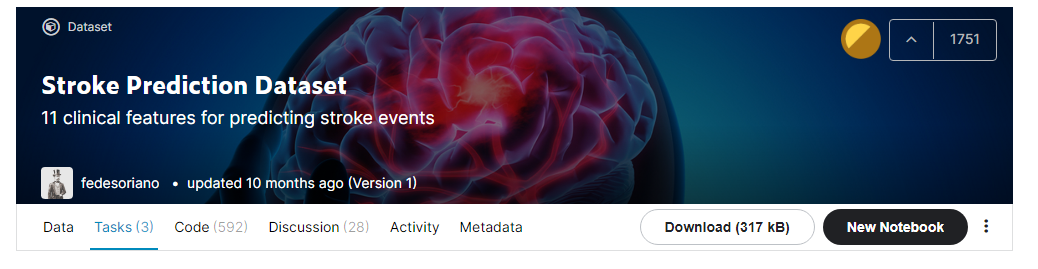

In [60]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [82]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv') # loading the dataset in pandas df
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [83]:
data.drop('id', axis=1, inplace=True) # Drop Id coulmn because its not requred in the model

In [64]:
data.dtypes # desplaying the data types of data columns

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [66]:
data.info() # Dataset info which shows bmi has null values 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [41]:
data.shape # numbers of (Rows & column in dataset)

(5110, 11)

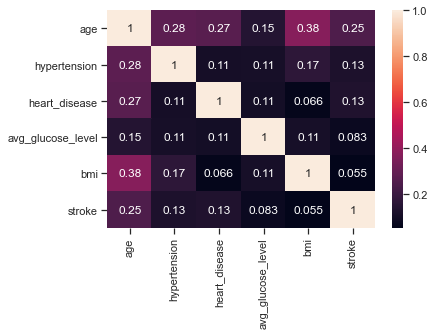

In [67]:
# co-relation of target variable with numeric feature metrix

heat_map = sns.heatmap(data[['age', 'hypertension', 'heart_disease','avg_glucose_level','bmi','stroke']].corr(method='spearman'),annot=True)

### Number of observation in Categorical Features 

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
stroke_data = data

#### Bar graph shows number of gender types present in Data. 

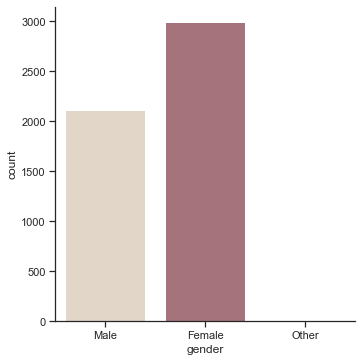

In [69]:
sns.catplot(x="gender", kind="count", palette="ch:.25", data=stroke_data)

#### Bar graph shows number of ever_married categories present in Data. 

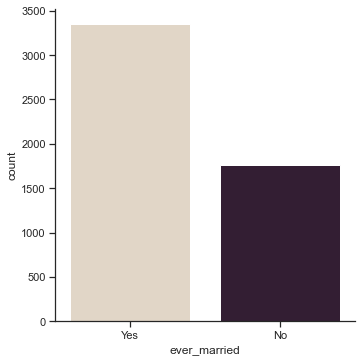

In [44]:
sns.catplot(x="ever_married", kind="count", palette="ch:.25", data=stroke_data)


#### Bar graph shows number of work_type categories present in Data. 

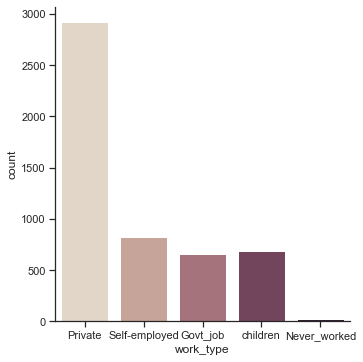

In [45]:
sns.catplot(x="work_type", kind="count", palette="ch:.25", data=stroke_data)


#### Bar graph shows number of Residence_type categories present in Data. 

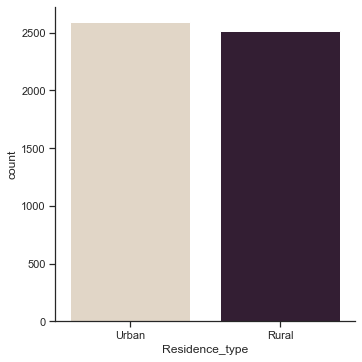

In [46]:
sns.catplot(x="Residence_type", kind="count", palette="ch:.25", data=stroke_data)


#### Bar graph shows number of smoking_status categories present in Data. 

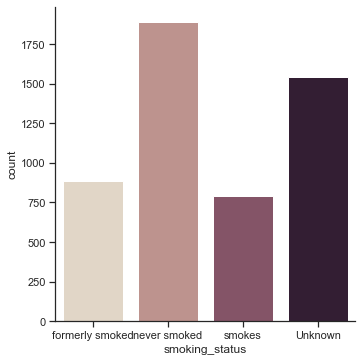

In [70]:
sns.catplot(x="smoking_status", kind="count", palette="ch:.25", data=stroke_data)


#### Handling Null values in data 

In [48]:
data[data['bmi'].isnull()]
data['bmi'].fillna(data['bmi'].mean(),inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


#### Encoding the categorical feature we want to use in model

In [71]:
## encoding using pandas get dummies function 

data['gender'] = pd.Categorical(data['gender'])  
encode_gender = pd.get_dummies(data['gender'], prefix = 'encode_gender')


data['ever_married'] = pd.Categorical(data['ever_married'])
encode_ever_married = pd.get_dummies(data['ever_married'], prefix = 'encode_ever_married')


data['work_type'] = pd.Categorical(data['work_type'])
encode_work_type = pd.get_dummies(data['work_type'], prefix = 'encode_work_type')


data['Residence_type'] = pd.Categorical(data['Residence_type'])
encode_Residence_type = pd.get_dummies(data['Residence_type'], prefix = 'encode_Residence_type')


data['smoking_status'] = pd.Categorical(data['smoking_status'])
encode_smoking_status = pd.get_dummies(data['smoking_status'], prefix = 'encode_smoking_status')


#### Drop the original column in data whch will replaced by encoded columns

data.drop('gender', axis=1, inplace=True)
data.drop('ever_married', axis=1, inplace=True)
data.drop('work_type', axis=1, inplace=True)
data.drop('Residence_type', axis=1, inplace=True)
data.drop('smoking_status', axis=1, inplace=True)

#### Adding the encoded columns with original dataset

In [50]:
data = pd.concat([data, encode_gender], axis=1)
data = pd.concat([data, encode_ever_married], axis=1)
data = pd.concat([data, encode_work_type], axis=1)
data = pd.concat([data, encode_Residence_type], axis=1)
data = pd.concat([data, encode_smoking_status], axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,encode_work_type_Never_worked,encode_work_type_Private,encode_work_type_Self-employed,encode_work_type_children,encode_Residence_type_Rural,encode_Residence_type_Urban,encode_smoking_status_Unknown,encode_smoking_status_formerly smoked,encode_smoking_status_never smoked,encode_smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,...,0,1,0,0,0,1,0,0,1,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,...,0,0,1,0,0,1,0,0,1,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,...,0,0,1,0,1,0,0,0,1,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,...,0,1,0,0,1,0,0,1,0,0


#### Defining the feature and Target columns from data

In [51]:
features  = ['age', 'hypertension','heart_disease','avg_glucose_level','bmi','encode_gender_Female','encode_gender_Male',             'encode_gender_Other','encode_ever_married_No','encode_ever_married_Yes','encode_work_type_Never_worked',
'encode_work_type_Govt_job','encode_work_type_Self-employed','encode_work_type_Private','encode_work_type_children',             'encode_Residence_type_Rural',
'encode_Residence_type_Urban','encode_smoking_status_Unknown','encode_smoking_status_formerly smoked',
'encode_smoking_status_never smoked','encode_smoking_status_smokes']
target = ['stroke']


#### Assigning the feature and target to X and y 

In [52]:

X = data[features]
y = data[target]

#### Spliting the data to Train Test set and standard scaler is apply to X 

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=37)
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


#### Intiating the models which we want to work upon

In [55]:
lr = LogisticRegression()
rf = RandomForestClassifier(random_state=55,n_estimators=200,max_depth=5,)
knn = KNeighborsClassifier()


#### Function to plot confusion Metrics of result

In [74]:
def plot_confusion_matrix(y_actual, y_pred, labels, title=''):
    ax= plt.subplot()
    cm = confusion_matrix(y_actual, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  
    ax.set_xlabel('Predicted Values');ax.set_ylabel('True Values'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);    


### Logistic Regression Classifier 

C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Train score of trained model: 0.95
Test score of trained model: 0.95
Accuracy: 95.31

Confussion matrix: 
[[1218   60]
 [   0    0]]



C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1278
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1278
   macro avg       0.50      0.48      0.49      1278
weighted avg       1.00      0.95      0.98      1278



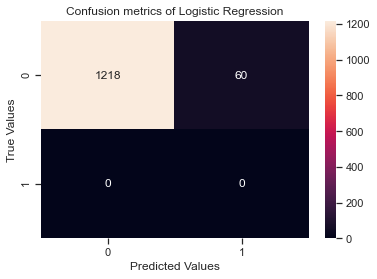

In [79]:
lr.fit(X_train, y_train)                                    # Fit the training set to Logistic regression model 

train_score = round(lr.score(X_train, y_train),2)           # displaying its training score 
print(f'Train score of trained model: {train_score}')

test_score = round(lr.score(X_test, y_test),2)              # displaying its test score 
print(f'Test score of trained model: {test_score}')

y_predictions = lr.predict(X_test)                          # Predicting value on test test

conf_matrix = confusion_matrix(y_predictions, y_test)       # creating confusion metrics from sklearn.Metrics

print(f'Accuracy: {round((accuracy_score(y_predictions, y_test)*100),2)}')  
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

# Calling the confusion metrics heat map
labels = ['0', '1']   
plot_confusion_matrix(y_predictions, y_test,labels ,'Confusion metrics of Logistic Regression') 

# Displaying classification report
y_pred = lr.predict(X_test)
print(classification_report(y_predictions, y_test,target_names=["0","1"]))

### Random Forest Classifier

<ipython-input-80-113f0a3ec3b9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)                               # Fit the training set to Random Forest model


Train score of trained model: 0.95
Test score of trained model: 0.95
Accuracy: 95.31

Confussion matrix: 
[[1218   60]
 [   0    0]]

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1278
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1278
   macro avg       0.50      0.48      0.49      1278
weighted avg       1.00      0.95      0.98      1278



C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


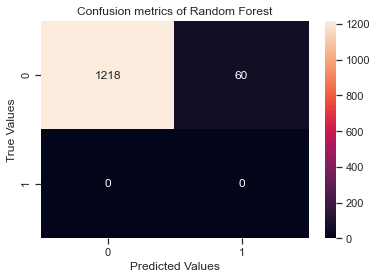

In [80]:
rf.fit(X_train, y_train)                               # Fit the training set to Random Forest model 

train_score = round(rf.score(X_train, y_train),2)      # displaying its training score
print(f'Train score of trained model: {train_score}')

test_score = round(rf.score(X_test, y_test),2)         # displaying its test score 
print(f'Test score of trained model: {test_score}')

y_predictions = rf.predict(X_test)                     # Predicting value on test test


conf_matrix = confusion_matrix(y_predictions, y_test)  # creating confusion metrics from sklearn.Metrics

print(f'Accuracy: {round((accuracy_score(y_predictions, y_test)*100),2)}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

# Calling the confusion metrics heat map
labels = ['0', '1']
plot_confusion_matrix(y_predictions, y_test,labels ,'Confusion metrics of Random Forest')

# Displaying classification report
y_pred = rf.predict(X_test)
print(classification_report(y_predictions, y_test,target_names=["0","1"]))

 ### K nearest neighbour classifier 

C:\Users\Astha\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train score of trained model: 0.95
Test score of trained model: 0.95
Accuracy: 95.23

Confussion matrix: 
[[1216   59]
 [   2    1]]

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1275
           1       0.02      0.33      0.03         3

    accuracy                           0.95      1278
   macro avg       0.51      0.64      0.50      1278
weighted avg       1.00      0.95      0.97      1278



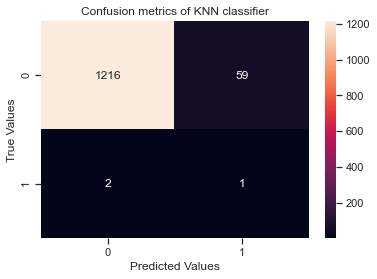

In [81]:
knn.fit(X_train, y_train)                                  # Fit the training set to KNN model 

train_score = round(knn.score(X_train, y_train),2)         # displaying its training score 
print(f'Train score of trained model: {train_score}')

test_score = round(knn.score(X_test, y_test),2)            # displaying its test score 
print(f'Test score of trained model: {test_score}')

y_predictions = knn.predict(X_test)                        # Predicting value on test test

conf_matrix = confusion_matrix(y_predictions, y_test)      # creating confusion metrics from sklearn.Metrics

print(f'Accuracy: {round((accuracy_score(y_predictions, y_test)*100),2)}')
print()
print(f'Confussion matrix: \n{conf_matrix}\n')

# Calling the confusion metrics heat map
labels = ['0', '1']
plot_confusion_matrix(y_predictions, y_test,labels ,'Confusion metrics of KNN classifier')

# Displaying classification report
y_pred = knn.predict(X_test)
print(classification_report(y_predictions, y_test,target_names=["0","1"]))

### Classification Result

- The models trained for this problem has return closely similar accuracy.
- I can say Random Forest is best suitable for this problem from the Train score : 0.95,Test score: 0.95 and overall Accuracy: 95.31.
- Both Random forest and Linear regression has very similar result in overall accuracy and in confusion mertics except its test score results.
- As per this result I can conclde random forest can better classify whether a person will have the stroke or not. 

### Kaggle Notebook potential problem 

- The cell execution sometime take a lot of time compare to Jupyter notebook.
- The interface of the notebook needs some knowledge to import the data and requires to browse its option before to start work on it. 
- Whereas in the Jupyter notebook user can easily understand how to start workflow. 